In [1]:
# Importing the necessary libaries
import numpy
import os
import pandas as pd
import argparse
import h5py
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import itertools
from matplotlib import pyplot as plt

In [2]:
# Lets load up the data from the original, as well as teh Z score and the auto encoders

df_zscore = pd.read_csv("./identified_fraud_zscore.csv")
df_ae     = pd.read_csv("./identified_fraud_autoencoder.csv")
df_vae    = pd.read_csv("./identified_fraud_variational_autoencoder.csv")


In [3]:
print(df_zscore.columns)
print(df_ae.columns)
print(df_vae.columns)

Index(['Unnamed: 0', 'TransactionID', 'AccountID', 'TransactionAmount',
       'TransactionDate', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'PreviousTransactionDate', 'TransactionDate_dt',
       'PreviousTransactionDate_dt', 'TransactionDate_hour',
       'TransactionWeekNumber', 'DaysSinceLastPurchase', 'Any_ZScore_Fraud'],
      dtype='object')
Index(['Unnamed: 0', 'TransactionType', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'PreviousTransactionDate', 'TransactionDate_hour',
       'TransactionWeekNumber', 'DaysSinceLastPurchase', 'MSE_AE_zscores',
       'MSE_AE', 'MSE_AE_Fraud'],
      dtype='object')
Index(['Unnamed: 0', 'TransactionType', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBa

In [4]:
# Lets make a lcone of the z score dataset to append the fraud indicators to
df=df_zscore.copy()

In [5]:
# Lets add the columns indicating fraud from the AE and the VAE to the dataframe
df['MSE_AE_Fraud'] = df_ae['MSE_AE_Fraud']
df['MSE_VAE_Fraud'] = df_vae['MSE_VAE_Fraud']

In [6]:
df

,Unnamed: 0,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,...,AccountBalance,PreviousTransactionDate,TransactionDate_dt,PreviousTransactionDate_dt,TransactionDate_hour,TransactionWeekNumber,DaysSinceLastPurchase,Any_ZScore_Fraud,MSE_AE_Fraud,MSE_VAE_Fraud
0,0,TX000001,AC00128,14.09,4/11/23 16:29,Debit,San Diego,D000380,162.198.218.92,M015,...,5112.21,11/4/24 08:08,2023-04-11 16:29:00,2024-11-04 08:08:00,16,15,572.652083,Normal,False,False
1,1,TX000002,AC00455,376.24,6/27/23 16:44,Debit,Houston,D000051,13.149.61.4,M052,...,13758.91,11/4/24 08:09,2023-06-27 16:44:00,2024-11-04 08:09:00,16,26,495.642361,Normal,False,False
2,2,TX000003,AC00019,126.29,7/10/23 18:16,Debit,Mesa,D000235,215.97.143.157,M009,...,1122.35,11/4/24 08:07,2023-07-10 18:16:00,2024-11-04 08:07:00,18,28,482.577083,Normal,False,False
3,3,TX000004,AC00070,184.50,5/5/23 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,...,8569.06,11/4/24 08:09,2023-05-05 16:32:00,2024-11-04 08:09:00,16,18,548.650694,Normal,False,False
4,4,TX000005,AC00411,13.45,10/16/23 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,...,7429.40,11/4/24 08:06,2023-10-16 17:51:00,2024-11-04 08:06:00,17,42,384.593750,Normal,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,2507,TX002508,AC00297,856.21,4/26/23 17:09,Credit,Colorado Springs,D000625,21.157.41.17,M072,...,12690.79,11/4/24 08:11,2023-04-26 17:09:00,2024-11-04 08:11:00,17,17,557.626389,Normal,False,False
2508,2508,TX002509,AC00322,251.54,3/22/23 17:36,Debit,Tucson,D000410,49.174.157.140,M029,...,254.75,11/4/24 08:11,2023-03-22 17:36:00,2024-11-04 08:11:00,17,12,592.607639,Normal,False,False
2509,2509,TX002510,AC00095,28.63,8/21/23 17:08,Debit,San Diego,D000095,58.1.27.124,M087,...,3382.91,11/4/24 08:08,2023-08-21 17:08:00,2024-11-04 08:08:00,17,34,440.625000,Normal,False,False
2510,2510,TX002511,AC00118,185.97,2/24/23 16:24,Debit,Denver,D000634,21.190.11.223,M041,...,1776.91,11/4/24 08:12,2023-02-24 16:24:00,2024-11-04 08:12:00,16,8,618.658333,Normal,False,False


In [7]:
# Dosent look like the columns are consistent, one has the labels of fraud as "Normal" and fraud, instead of True or False
df['Any_ZScore_Fraud'].unique()

array(['Normal', 'Fraud'], dtype=object)

In [8]:
# Lets fix that
df['Any_ZScore_Fraud'] = df['Any_ZScore_Fraud'].replace("Normal", False)
df['Any_ZScore_Fraud'] = df['Any_ZScore_Fraud'].replace("Fraud", True)

/var/folders/qj/3zmdfhnn4bxgc68lbfycnlt40000gn/T/ipykernel_6632/1680774397.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Any_ZScore_Fraud'] = df['Any_ZScore_Fraud'].replace("Fraud", True)


In [9]:
# Lets create a column that contains the label for events that triggered fraud for all methods
df["Fraud_all_methods"] = ((df["Any_ZScore_Fraud"]==True) & (df["MSE_AE_Fraud"]==True) & (df["MSE_VAE_Fraud"]==True))

In [20]:
df.dtypes

Unnamed: 0                      int64
TransactionID                  object
AccountID                      object
TransactionAmount             float64
TransactionDate                object
TransactionType                object
Location                       object
DeviceID                       object
IP Address                     object
MerchantID                     object
Channel                        object
CustomerAge                     int64
CustomerOccupation             object
TransactionDuration             int64
LoginAttempts                   int64
AccountBalance                float64
PreviousTransactionDate        object
TransactionDate_dt             object
PreviousTransactionDate_dt     object
TransactionDate_hour            int64
TransactionWeekNumber           int64
DaysSinceLastPurchase         float64
Any_ZScore_Fraud                 bool
MSE_AE_Fraud                     bool
MSE_VAE_Fraud                    bool
Fraud_all_methods                bool
dtype: objec

In [10]:
# Determining the total number of fraud cases
fraud_count =(df["Fraud_all_methods"]==True).sum()

# Of all the cases, there are some that have a statistical anamoly enough for the autoencoder to pick up, and constitute fraud, these are
print("{} out of {} data entries have fraud characteristics, or {}% of the sample".format(fraud_count, df["Fraud_all_methods"].count(),100*fraud_count/df["Fraud_all_methods"].count()))



68 out of 2512 data entries have fraud characteristics, or 2.7070063694267517% of the sample


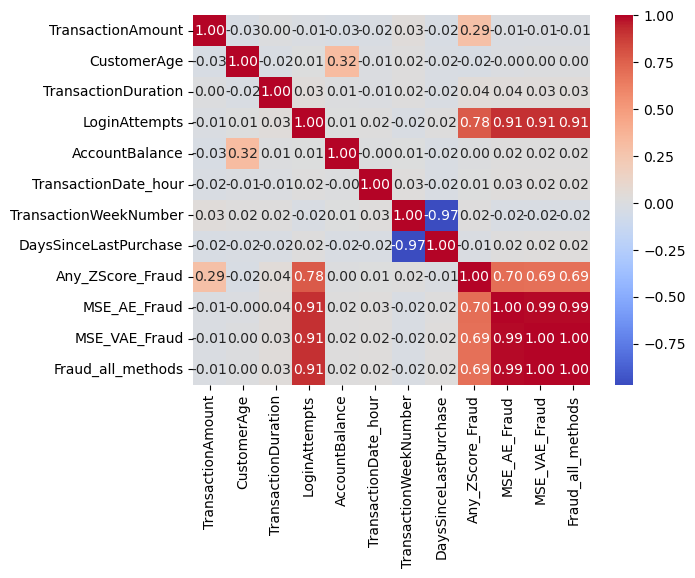

In [42]:
# Creating correlation data
corr_data = df.select_dtypes(include=['int64',"float64","bool"]).drop(["Unnamed: 0"], axis=1).corr()
sns.heatmap(corr_data, cbar=True, fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

In [44]:
corr_data["Fraud_all_methods"].drop(["Any_ZScore_Fraud","MSE_AE_Fraud","MSE_VAE_Fraud"]).sort_values(ascending=False)

Fraud_all_methods        1.000000
LoginAttempts            0.909992
TransactionDuration      0.034025
TransactionDate_hour     0.024898
DaysSinceLastPurchase    0.024615
AccountBalance           0.018177
CustomerAge              0.001954
TransactionAmount       -0.009455
TransactionWeekNumber   -0.022032
Name: Fraud_all_methods, dtype: float64

<Axes: >

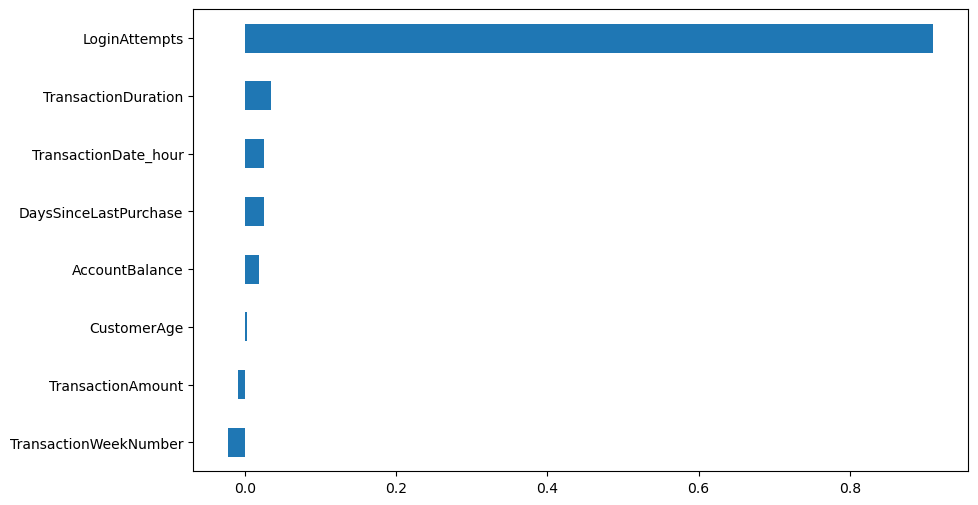

In [47]:
corr_data["Fraud_all_methods"].drop(["Fraud_all_methods","Any_ZScore_Fraud","MSE_AE_Fraud","MSE_VAE_Fraud"]).sort_values().plot(kind='barh', figsize=(10, 6))

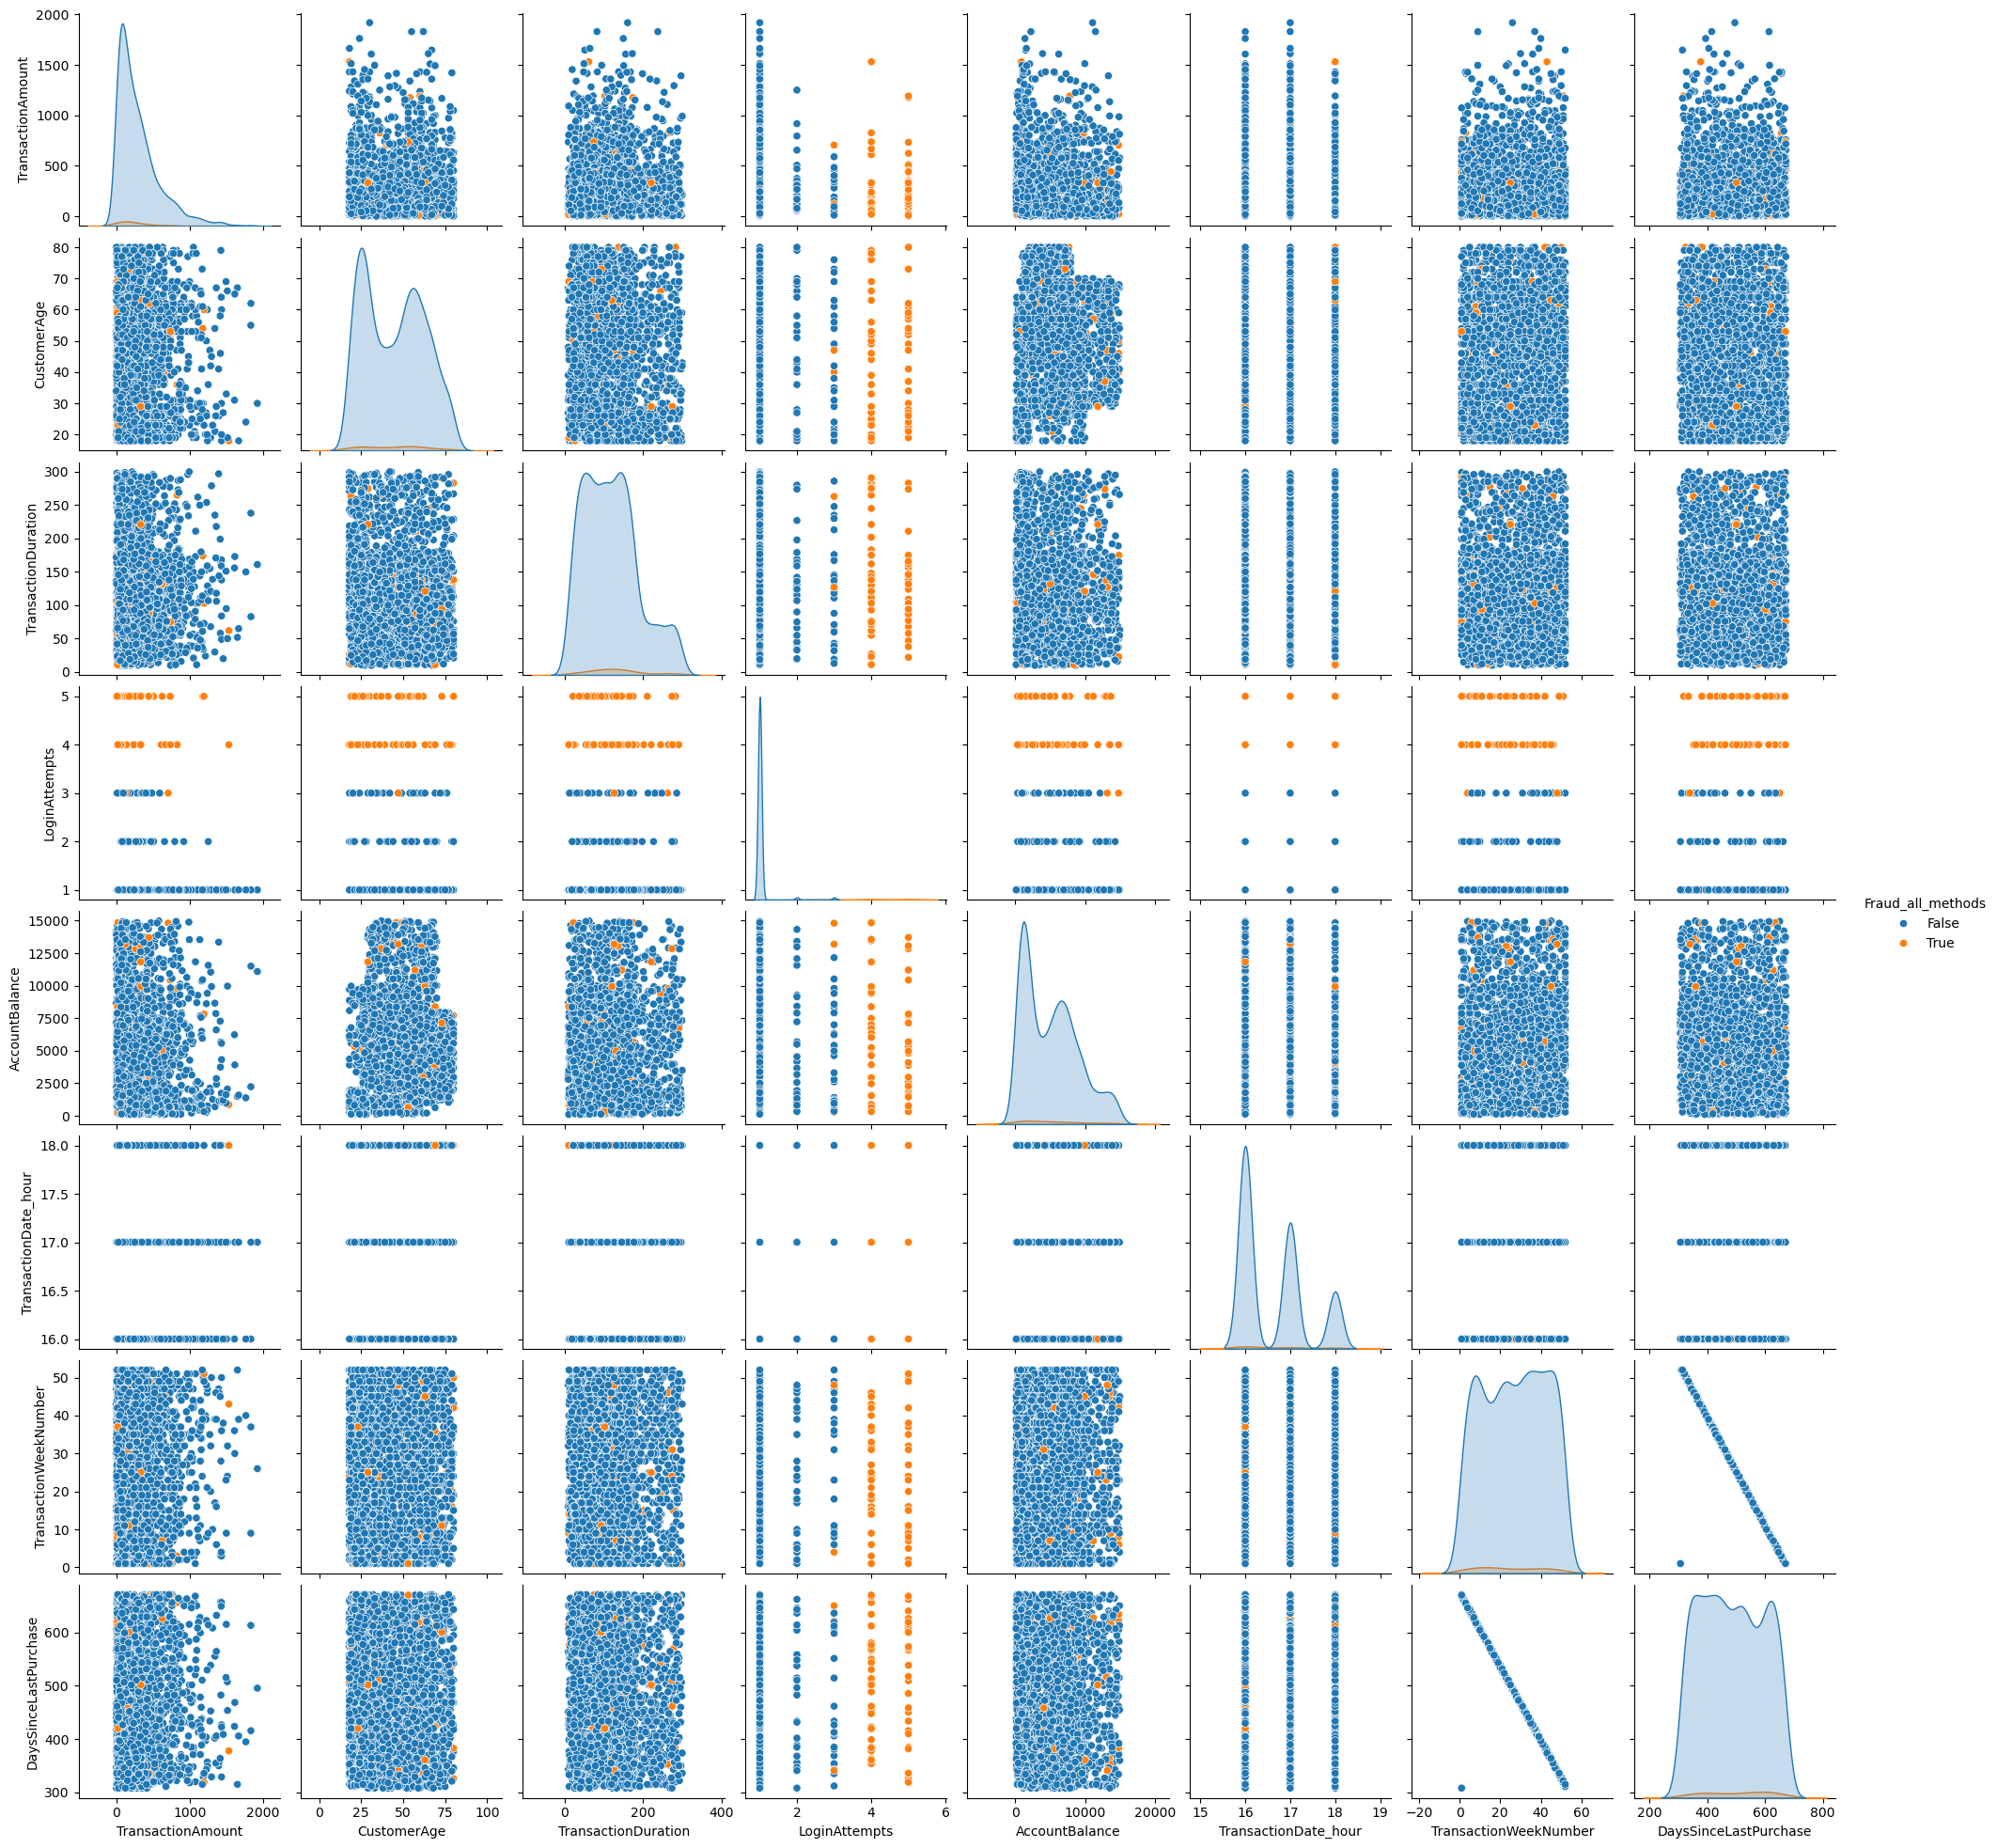

In [14]:
sns.pairplot(df.drop(["TransactionID",'Any_ZScore_Fraud','MSE_AE_Fraud','MSE_VAE_Fraud','Unnamed: 0'], axis=1), hue="Fraud_all_methods")
plt.show()

In [50]:
# Lets define some functions that will let me plot
def create_histo_1d(x_var="MSE_AE", hue_var=None, dataset=df):
    # Histogram for plotting the frequency of a variable occurrence
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[x_var],
        hue = dataset[hue_var]==True,
        alpha=0.7
        
    )
    plt.title(x_var, fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.grid(True)
    plt.show()
    
def create_histo_2d(x_var, y_var, dataset):
    # 2D histogram for Z-Score fraud detection
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[x_var],
        y=dataset[y_var],
        hue=dataset["MSE"]>2,
        palette={True: 'red', False: 'blue'},
        alpha=0.7
    )
    plt.title('AutoEncoder Fraud Detection', fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend(title='Fraud', 
               labels=['Fraud', 'Normal'], 
               fontsize=12)
    plt.grid(True)
    plt.show()

def create_fraud_hist(x_var="MSE", dataset=df):
    # Histogram for plotting the frequency of a variable occurrence
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[dataset["MSE_Fraud"]==True][x_var],
        # hue = dataset[hue_var]==True,
        alpha=0.7,
        color='red'
        
    )
    plt.title(x_var, fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.grid(True)
    plt.show()
    
def create_scatter(x_var, y_var, hue_var, dataset, folder):
    # Creates a 2D scatterplot for Z-Score fraud detection
    plt.figure(figsize=(6, 4))
    markers = {True: "s", False: "X"}
    sns.scatterplot(
        x=dataset[x_var],
        y=dataset[y_var],
        hue=dataset["MSE"]>2,
        # palette={"Fraud": 'red', "Normal": 'blue'},
        palette={True: 'red', False: 'blue'},
        markers=markers,
        alpha=0.7
    )
    plt.title('AutoEncoder Fraud Detection', fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend(title='Fraud Potential', 
               # labels=["Fraud", "Normal"], 
               fontsize=12)
    plt.grid(True)
    plt.savefig("{}/{}_vs_{}.png".format(folder, x_var, y_var))
    plt.show()
    

In [48]:
# df.columns
# list(df.columns)

In [38]:
df.select_dtypes(include='number').columns
numeric_cols = ['TransactionType', 'Channel', 'CustomerAge', 'CustomerOccupation',
                'TransactionDuration', 'LoginAttempts', 'AccountBalance',
                'PreviousTransactionDate', 'TransactionDate_hour',
                'TransactionWeekNumber', 'DaysSinceLastPurchase']

Index(['Unnamed: 0', 'TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionDate_hour',
       'TransactionWeekNumber', 'DaysSinceLastPurchase'],
      dtype='object')

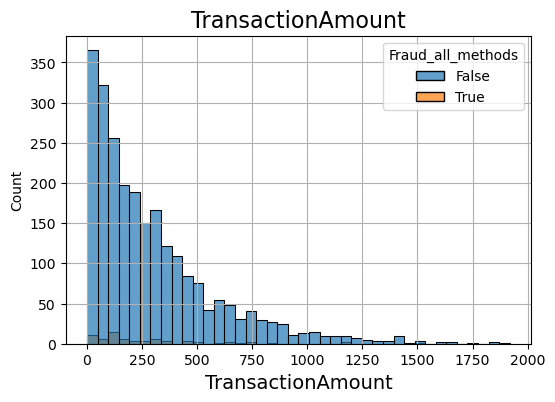

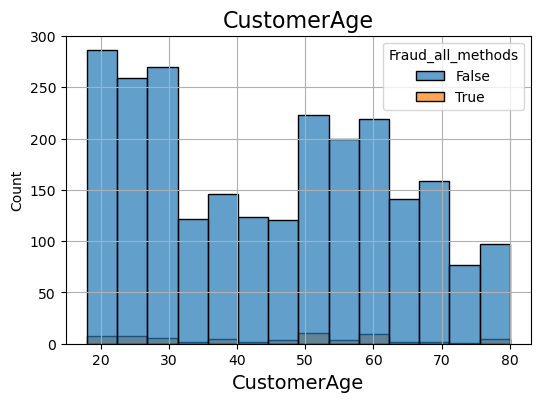

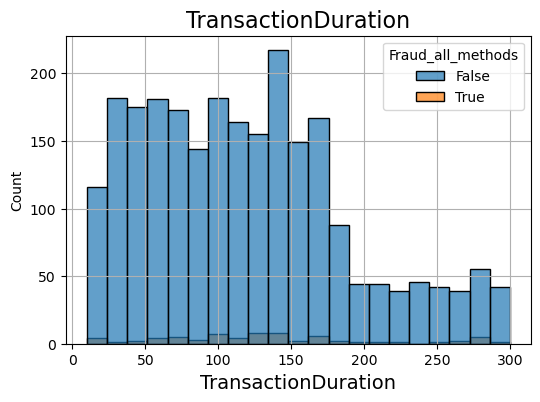

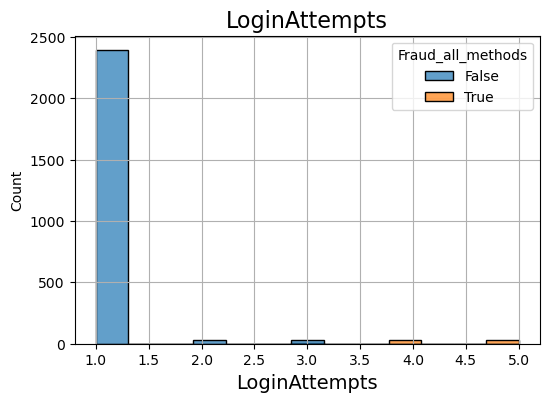

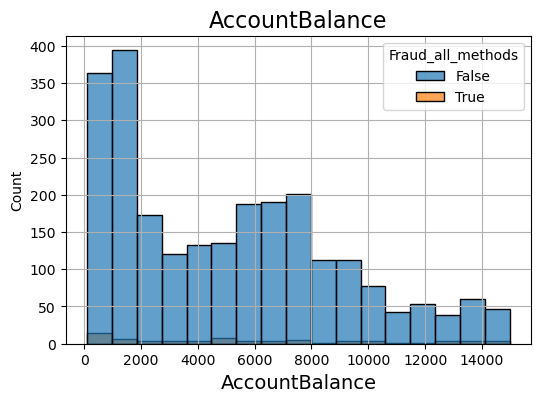

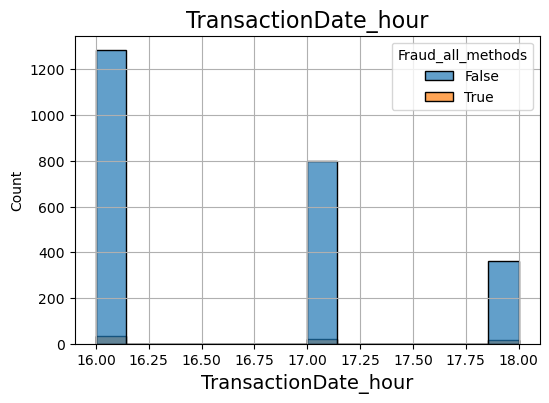

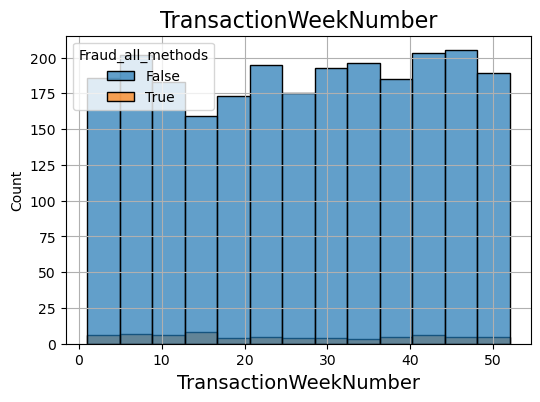

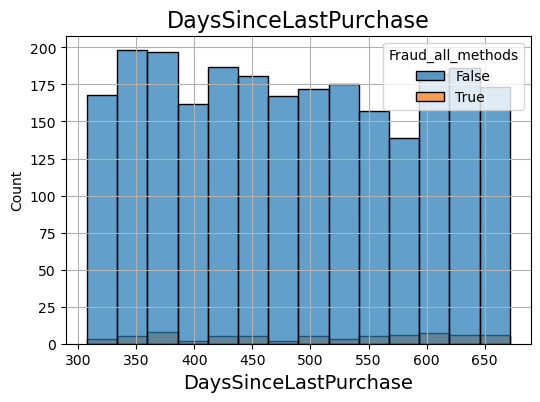

In [39]:
for var in list(df.select_dtypes(include='number').columns)[1:]:
    # Create histograms of instances of fraud
    create_histo_1d(var, hue_var="Fraud_all_methods", dataset=df)
    # Creating histograms that show ONLY the fraud data
    create_fraud_hist(var, dataset=df)

In [49]:
# Creating 2D plots of the characteristics
combinations = list(itertools.combinations(numeric_cols, 2))

NameError: name 'numeric_cols' is not defined

In [ ]:
# Defining all of the variables that I want to plot, and creating combinations of pairs for a 2D plot
numeric_cols = ['TransactionType', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate', 'TransactionDate_hour',
       'TransactionWeekNumber', 'DaysSinceLastPurchase']
combinations = list(itertools.combinations(numeric_cols, 2))
for pair in combinations:
    print(pair[0],pair[1])
    create_scatter(pair[0],pair[1], df, "autoencoder_plots")

In [ ]:
def create_histo_2d(x_var, y_var, dataset):
    # 2D histogram for Z-Score fraud detection
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[x_var],
        y=dataset[y_var],
        hue=dataset["MSE"]>2,
        palette={True: 'red', False: 'blue'},
        alpha=0.7
    )
    plt.title('AutoEncoder Fraud Detection', fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend(title='Fraud', 
               labels=['Fraud', 'Normal'], 
               fontsize=12)
    plt.grid(True)
    plt.show()

def create_histo_1d(x_var, hue, dataset):
    # Histogram for plotting the frequency of a variable occurrence
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[x_var],
        # hue = dataset["MSE_zscores"]>2,
        hue = dataset[hue]>2,
        alpha=0.7
    )
    plt.title(x_var, fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.grid(True)
    plt.show()
    
def create_scatter(x_var, y_var,dataset,folder):
    # Creates a 2D scatterplot for Z-Score fraud detection
    plt.figure(figsize=(6, 4))
    markers = {True: "s", False: "X"}
    sns.scatterplot(
        x=dataset[x_var],
        y=dataset[y_var],
        hue=dataset["MSE"]>2,
        # palette={"Fraud": 'red', "Normal": 'blue'},
        palette={True: 'red', False: 'blue'},
        markers=markers,
        alpha=0.7
    )
    plt.title('AutoEncoder Fraud Detection', fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend(title='Fraud Potential', 
               # labels=["Fraud", "Normal"], 
               fontsize=12)
    plt.grid(True)
    plt.savefig("{}/{}_vs_{}.png".format(folder, x_var, y_var))
    plt.show()
    